In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
base_data_folder = 'data_clustering/'

def get_data(directory, filename):
    with open(base_data_folder + '{}/{}'.format(directory, filename), 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        data = np.array([(int(x), int(y)) for (x,y) in data])
    return data

def get_clusters(X, bandwidth_quantile):
    bandwidth = estimate_bandwidth(X, quantile=bandwidth_quantile, n_samples=X.shape[0])
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    centers = ms.cluster_centers_
    return (labels, centers)

def plot_clusters(labels, centers, X, y):
    f, ax = plt.subplots(figsize=(9, 9))
    for k in range(len(centers)):
        cluster_members = labels == k
        plt.plot(X[cluster_members, 0], X[cluster_members, 1], '.')

    (low_x, high_x) = plt.xlim()
    total_x = high_x - low_x
    (low_y, high_y) = plt.ylim()
    total_y = high_y - low_y

    for k in range(len(centers)):
        predicted_center = centers[k]
        real_center = y[k]
        plt.plot(predicted_center[0], predicted_center[1], 'o', markerfacecolor='white', markersize=8, alpha=.7)
        plt.text(predicted_center[0] - (0.04 * total_x), predicted_center[1] - (0.04 * total_y), "Predicted", fontsize=14)

        plt.plot(real_center[0], real_center[1], 'o', markerfacecolor='black', markersize=8, alpha=.7)
        plt.text(real_center[0] - (0.04 * total_x), real_center[1] + (0.03 * total_y), "Real", fontsize=14)

    plt.title('Predicted and real centers')
    plt.show()
    
def predict_and_plot(directory, clusters_filename, real_centers_filename, bandwidth_quantile):
    X = get_data(directory, clusters_filename)
    y = get_data(directory, real_centers_filename)
    (labels, centers) = get_clusters(X, bandwidth_quantile)
    plot_clusters(labels, centers, X, y)

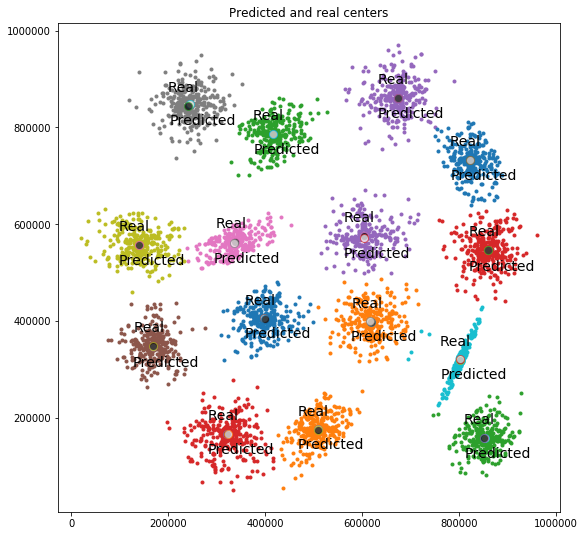

In [3]:
predict_and_plot('s', 's1.txt', 's1-cb.txt', 0.05)

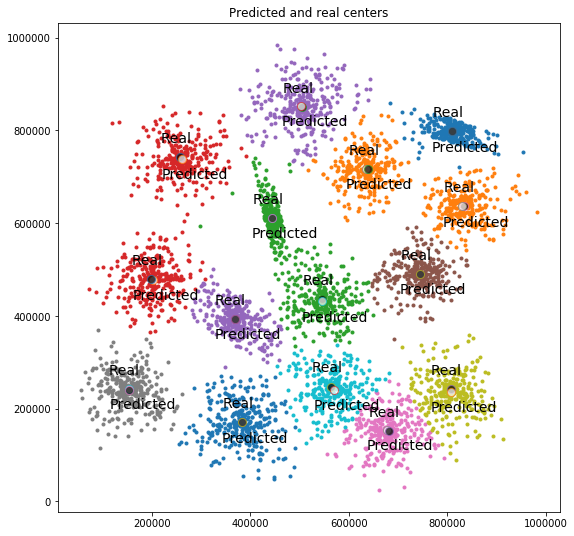

In [4]:
predict_and_plot('s', 's2.txt', 's2-cb.txt', 0.051)

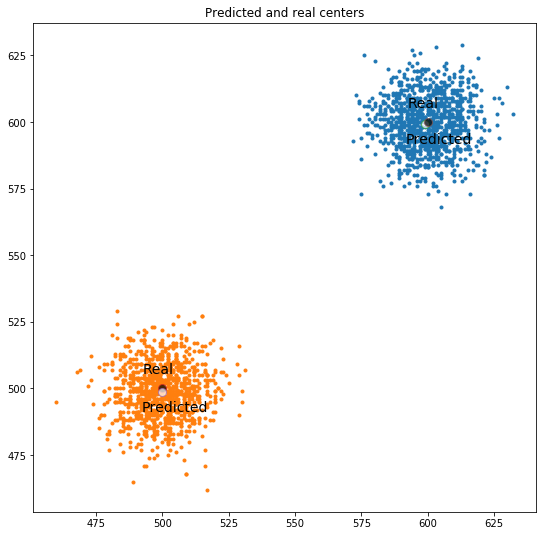

In [5]:
predict_and_plot('g2', 'g2-2-10.txt', 'g2-2-10-gt.txt', 0.25)